<a href="https://colab.research.google.com/github/syh0397/Statistics_python/blob/main/10_%EB%8B%A8%EC%88%9C%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(Simple_Regression_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
!pip install --upgrade pingouin
!pip install scikit_posthocs

In [ ]:
pip install statsmodels

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd 
import numpy as np 

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import sklearn 
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import scipy 
from scipy import  stats
import statsmodels.api as sm
import pylab as py


import pingouin as pg
import scikit_posthocs

pd.options.display.float_format = '{:.3f}'.format

## 단순회귀분석 
(단순회기분석은 청량리 위에 있음)

- 단순 회귀 분석은 독립변수x 가 하나인 경우에 사용된다 
- 독립 종속 모두 연속형 변수여야 한다. 
- 독립변수 x가 종속변수 y에 미치는 영향 (인과)에 대해서 추정할때 쓰인다. 

In [5]:
hos = sns.load_dataset('tips')
hos

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3
240,27.180,2.000,Female,Yes,Sat,Dinner,2
241,22.670,2.000,Male,Yes,Sat,Dinner,2
242,17.820,1.750,Male,No,Sat,Dinner,2


Dep. Variable: 종속변수

R-squared: 결정계수

Model: 분석모형

Adj. R-squared: 조정된 결정계수

Method: 모형 계산방식

F-statistics: 모형 적합도 통계량

Prob(F-statistics): F 통계량의 유의확률

DF Residuals: 잔차의 자유도

DF Model: 모형의 매개변수 수

AIC/BIC: 여러 모형의 적합도 비교



std err: 계수 추정치의 표준오차

t: t-value 검정통계량

P>|t|: 유의확률

[0.025 0.975]: 95% 신뢰구간 범위



Omnibus: 잔차의 왜도/첨도 검정통계량

Prob(Omnibus): Omnibus의 유의확률

Skew/Kurtosis: 왜도/첨도

Durbin-Watson: 잔차의 독립성 검정통계량

Jarque-Bera(JB): 잔차의 왜도/첨도 검정통계량

Prob(JB): JB의 유의확률

Cond. No.: 다중공선성 검정통계량

In [6]:
import statsmodels.formula.api as smf

# formula 회귀모형 
model = smf.ols(formula='tip~total_bill', data=hos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           6.69e-34
Time:                        18:01:01   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. 첫번째는 모형검정 - 첫번째 블록
2. 두번째는 계수검정 - 두번째 블록 
3. 세번째는 잔차검정 - 세번째 블록 

- R-squared:	0.457 모형 설명력 - 45프로
- Prob (F-statistic):	6.69e-34 :


- total_bill	coef 는 0.1050 
- total_bill 1단위 증가하면 tip은 0.1050 만큼 증가함 

Durbin-Watson:	2.151

- 잔차의 독립성 검정 2에 가까울수록 잔차의 독립성이 확보됨 = 좋은 모형이다.
- 잔차 검정 - 모델의 검정 

산점도와 선형회귀선을 그려본다.


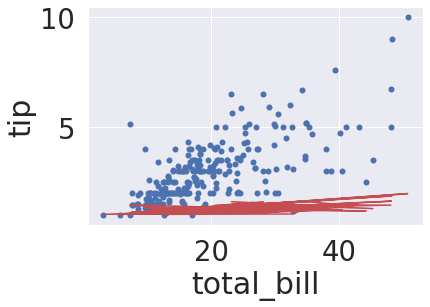

In [8]:
fit = np.polyfit(hos['total_bill'], hos['tip'], 1)
fit_fn = np.poly1d(fit)

%matplotlib inline
plt.xlabel('total_bill')
plt.ylabel('tip')

plt.plot(hos['total_bill'], hos['tip'], 'o')
plt.plot(hos['total_bill'], fit_fn(hos['tip']), 'r');